# Initial Seed for Algorithms
In this very short note we will try to argue why initialization is important for descent algorithms like gradient descent.
We are considering problems where the goal is to find a set of parameters that maximize/minimize a given function $f$.

In deep learning $f$ could be a function that takes as input the parameters of a neural network  (many numbers) and returns **one** number that indicates how well the neural net with the given set of parameters predicts the correct label for the images in the data. The smaller the value the better.  The goal of training is to find a good set of parameters (small value of f that also works on data not contained in the data set)


In the general case there are also restrictions on the value each $x_i$ can take. 


In (fancy) math notation the problem we consider is as follows: Given function $f$ and restricted space of possible parameter values $X$ compute
$$
\textrm{argmin}_{(x_1,\dots, x_d) \in X} f(x_1, \dots, x_d)
$$


We use minimize in this note but it makes no real difference as it corresponds to maximizing -f. 

Lets start with a simple example. Assume we are trying to minimize the following function $f$ of one parameter, $f(x) = x^2 \sin(x)$ where x is restricted to be in the interval [-1, 1]

See below for a plot of f

Here it seems that x=0 is the solution we are looking for if we wish to minimize $f$. So this was easy, but in general we have millions of parameters and this method of just plotting the function we care about is not applicable.



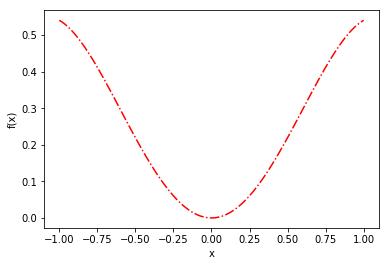

In [73]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 100) # 100 points between -1, 1 uniformly spread
fx = x**2 * np.cos(x) # compute f(x) on the data
plt.plot(x, fx, 'r-.')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Using Algorithms - Simplest First
Since in general the function we care about about may require thousands or even millions of parameters (for instance in deep learning) we need algorithms to find good settings of the parameters.

## Really Simple algorithm: Random sampling.
$\quad$ Repeatedly sample parameters, $x$, from domain (in case above a number in  [-1, +1])
  
$\quad$ For each sample x, compute f(x)
    
$\quad$ Return best f(x) found.

Is this a good algorithm. That depends. If the function has its minimum in a good fraction of the domain then this will work fine. 
For instance for the function below this will be fine.

A simple tweak to this algorithms is after having done a number of random samples. Pick the best parameters seen so far and start sampling in the area around that point.
Repeat this process until you have found a good solution. 

Side Note: This algorithm is actually also a basic algorithm used for instance in machine learning for particular kind of problems. Albeit many variants and more complex algorithms also exists for the same problems this may in some cases not be so bad as this algorithm is simple to implement, easy to pararellize and requires nothing more than the ability to evaluate the function $f$


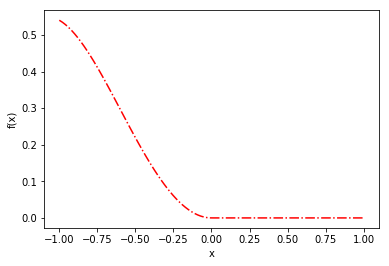

In [16]:
x = np.linspace(-1, 1, 100) # 100 points between -1, 1 uniformly spread
fx = x**2 * np.cos(x) # compute f(x) on the data
fx[x>0] = 0
plt.plot(x, fx, 'r-.')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Using Algorithms - Gradient Descent
Basic algorithms like gradient descent are local search methods. That means you start from some initial setting of the parameters and then you explore the neighbourhood around the starting point. This is an iterative process that in each step tries to find a set or parameters (very) close to the current paramters that give a better value when f is applied to it. When such a set of parameters is found, the old parameters are discarded and the process restarts with the newly found parameters.

The algorithm can be described as follows.
## Descent Algorithm
$\quad$Start by chosing some parameters $x_0$ and set $x = x_0$ 

$\quad$Repeat following steps
        
$\quad$$\quad$ search domain around $x$ for parameters $\bar{x}$ such that $f(\bar{x}) < f(x)$

$\quad$$\quad$ set $x = \bar{x}$

Now there is two questions we need to consider before this algorithm actually works. 
1. How to chose $x_0$
2. How to search the neighbourhood around x for a better set of parameters

Lets start with part 2 which can be handled by math! If $f$ is a *reasonable* function we can solve this problem using math (differentation, partial derivatives, gradient) which allows us to find a such a $\bar{x}$ close to $x$ that improves f. If we use the math and  the so called *gradient* the algorithm is often named gradient descent (Disclaimer, there is of course much more to this step but for this is not the purpose of this explanation we will not discuss it any further.).

## Running Gradient Descent
In regards to our example above if we start with $x_0=-0.5$. Then using the math we can learn that to mimimie the function we need make a $x_0$ bigger, for instance we could learn that $\bar{x} = -.0499$ gives a better $f$. Now repeating this process it is possible to get (very close) to the optimal solution of $x=0$.

I have visualized the process for 10 steps below (ignore the tensorflow code that actually implements the math to find $\bar(x)$), and as you can see the blue crosses, tagged with iteration round, that shows the parameter values considered  by the algorithm and the corresponding value that converge towards the minimum possible value.



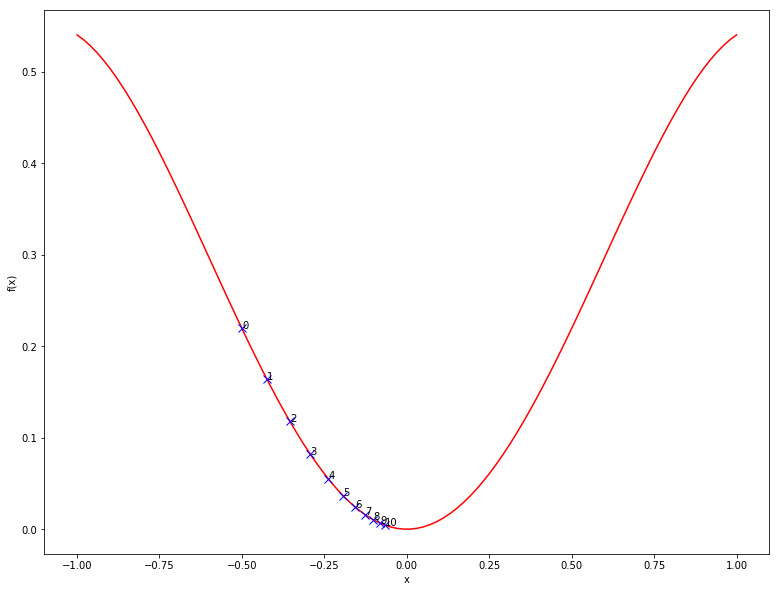

In [78]:
import tensorflow as tf
tf.enable_eager_execution()
xs = np.linspace(-1, 1, 100) # 100 points between -1, 1 uniformly spread
fx = xs**2 * np.cos(xs) # compute f(x) on the data
# write in pytorch

x = tf.constant(-0.5)
allx =[x.numpy()]
for i in range(10):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = x**2 * tf.cos(x)
        grad = tape.gradient(loss, x)
        #print(loss, grad)
        x = x - 0.1 * grad
        allx.append(x.numpy())
fig, ax = plt.subplots(1, 1, figsize=(13, 10))
ax.plot(xs, fx, 'r-', label='f(x)')
fallx = [x**2 * np.cos(x) for x in allx]
ax.plot(allx, fallx, 'bx', markersize=8, label='alg. steps')
#ax.scatter(allx, [x**2 * np.cos(x) for x in allx])
for i in range(len(allx)):
    ax.annotate(i, (allx[i], fallx[i]))

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()
#plt.plot(x, fx, 'r-.')

# Picking Starting Parameters
The algorithm above looked pretty great but that is just because the problem it solved is easy. Nonetheless it shows what the algorithm does.
You start it somewhere and then it walks locally to a minimum value nearby. For problems like this one above this is a very good algorithm.
And it does not matter where you start, we will get (very close) to the minimum, the only thing that changes is the number of steps to get close enough. But for the problem considered here this is number will be small if we apply the algorithm correctly.

Unfortunately, for the interesting problems we care about the function we consider looks more like the example below (in fact since the problems we care about has many more parameters it is hard to visualize and looks nothing like that, but the problem for descent algorithms still shows.

Can we see what happens if we run the gradient descent algorithm from above on this weird looking function?

Well the solution we find is the lowest point in the hold we start in, and we only find the smallest point if we somehow start the algorithm close to 0

And hence it is important where the algorithm starts if the problem we try to solve looks like the figure below.

If we insist on using such a gradient algorithm the job of the developer, algorithm designer etc. is to decide on a good way of finding starting points. Of course this gradient algroithm can be easily combined with the random sampling algorithm and then the overall algorithm returns the value of the solution of the best starting position.  Of course this is just the basic story and the most basic of approaches. Problems like this have been studied by very many smart people for very many years and many many different approaches exists that work well for particular combinations of problems and algorithms, and the algorithm is often used inside other algorithms for instance the approach DeepMind took to learn to play old Atari computer games, as well as Go and Chess with AlphaZero. 

The conclusion is 
- For different problems different algorithms work better. The job for algorithm engineers, designers, developers, researchers is to find the right algorithm for the problem at hand. And the unlucky algorithms researchers has to prove that the algorithm they designed for a particular problem is good while the rest of us can just try and test different things and be happy if the results are satisfactory :)
- Luckily there are a lot of smart people that has come up with a lot of smart solutions that are more less general or suited for particular kind of problems that one may try. Albeit it is not easy to know all of them, large frameworks like tensorflow has a lot to offer in particular for problems in machine learning


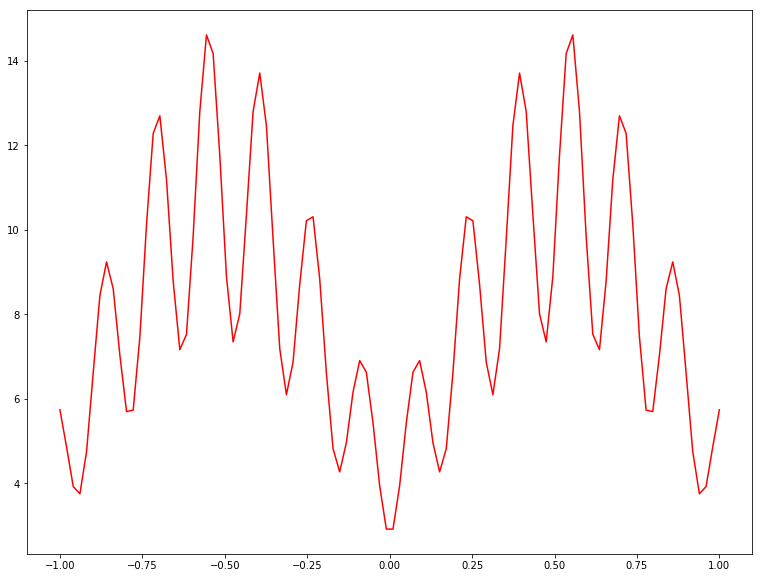

In [72]:
xs = np.linspace(-1, 1, 100) # 100 points between -1, 1 uniformly spread
# fx = (1+np.sin(20*xs)**2) * np.exp(np.abs(xs)+1)
fx = (1+np.sin(20*xs)**2) * np.exp(np.abs(np.sin(xs*3))+1)
fig, ax = plt.subplots(1, 1, figsize=(13, 10))
ax.plot(xs, fx, 'r-', label='f(x)')
plt.show()